## 数据处理


In [45]:
import numpy as np
import json
# 读取数据
datafile = './work/housing.data'
data = np.fromfile(datafile, sep = ' ')
print(data)
data

[6.320e-03 1.800e+01 2.310e+00 ... 3.969e+02 7.880e+00 1.190e+01]


array([6.320e-03, 1.800e+01, 2.310e+00, ..., 3.969e+02, 7.880e+00,
       1.190e+01])

### 数据形式的转换


In [46]:
# 一维的array要转换成2维的array
feature_names =  [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
feature_num = len(feature_names)
print('data.shape[0]', data.shape[0])
data = data.reshape([data.shape[0] // feature_num, feature_num])
data

data.shape[0] 7084


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

## 数据集的划分
经典的划分成训练集和测试集

In [47]:
ratio = 0.78
offest = int(data.shape[0] * ratio)
training_data = data[:offest]
training_data.shape

(394, 14)

## 数据归一化处理
==高亮==

In [48]:
# 计算最大值和最小值
maximums, minimums = training_data.max(axis=0), training_data.min(axis=0)
# 归一化处理
for i in range(feature_num): # 太帅了，直接对所有的数据一行就操作完了
    data[:,i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])
data

array([[0.00000000e+00, 1.80000000e-01, 7.34418420e-02, ...,
        1.00000000e+00, 8.96799117e-02, 3.92523364e-01],
       [2.35922539e-04, 0.00000000e+00, 2.62405717e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.36448598e-01],
       [2.35697744e-04, 0.00000000e+00, 2.62405717e-01, ...,
        9.87519166e-01, 6.34657837e-02, 6.42523364e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.55339420e-01, ...,
        1.00000000e+00, 1.07891832e-01, 3.90186916e-01],
       [1.16072990e-03, 0.00000000e+00, 4.55339420e-01, ...,
        9.89420423e-01, 1.31070640e-01, 3.45794393e-01],
       [4.61841693e-04, 0.00000000e+00, 4.55339420e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.09813084e-01]])

In [49]:
# 计算train数据集的最大值，最小值
maximums, minimums = \
                     training_data.max(axis=0), \
                     training_data.min(axis=0), 
# 对数据进行归一化处理
for i in range(feature_num):
    data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])
data

array([[0.00000000e+00, 1.80000000e-01, 7.34418420e-02, ...,
        1.00000000e+00, 8.96799117e-02, 3.92523364e-01],
       [2.35922539e-04, 0.00000000e+00, 2.62405717e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.36448598e-01],
       [2.35697744e-04, 0.00000000e+00, 2.62405717e-01, ...,
        9.87519166e-01, 6.34657837e-02, 6.42523364e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.55339420e-01, ...,
        1.00000000e+00, 1.07891832e-01, 3.90186916e-01],
       [1.16072990e-03, 0.00000000e+00, 4.55339420e-01, ...,
        9.89420423e-01, 1.31070640e-01, 3.45794393e-01],
       [4.61841693e-04, 0.00000000e+00, 4.55339420e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.09813084e-01]])

In [50]:
# 封装成load_data
def load_data():
    # 获取数据
    datafile = './work/housing.data'
    data = np.fromfile(datafile, sep = ' ')

    # 每个特征的名字
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)
    
    # 把一维的数据reshape成二维
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # 划分训练集和测试集
    ratio = 0.82
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算最小值和最大值进行归一化
    maximums, minimums = training_data.max(axis=0), training_data.min(axis=0)

    # 对数据进行归一化处理
    for i in range(feature_num):
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])
    
    # 训练集和测试集的划分
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data


In [51]:
training_data, test_data = load_data()
x = training_data[:,:-1]
y = training_data[:,-1:]
print(x[0],y[0])

[0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991] [0.42222222]


## 模型的设计
前馈神经网络

In [52]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机化权重W,肯定是要给一个权重数量的，固定随机数种子
        np.random.seed(1)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
    def forward(self,x):
        z = np.dot(x, self.w) +self.b
        return z
    
    # 定义损失函数
    def loss(self, z, y):
        error = z - y
        cost = error * error
        cost = np.mean(cost)
        return cost

In [53]:
# 拿前三个试一下
x1 = x[0:3]
y1 = y[0:3]
print(x1,y1)
net = Network(13)
z1 = net.forward(x1)
print(z1)
loss = net.loss(z1,y1)
print(loss)

[[0.00000000e+00 1.80000000e-01 7.34418420e-02 0.00000000e+00
  3.14814815e-01 5.77505269e-01 6.41606591e-01 2.69203139e-01
  0.00000000e+00 2.27557411e-01 2.87234043e-01 1.00000000e+00
  8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 5.47997701e-01 7.82698249e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 1.00000000e+00
  2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 6.94385898e-01 5.99382080e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 9.89677910e-01
  6.34657837e-02]] [[0.42222222]
 [0.36888889]
 [0.66      ]]
[[-2.01688416]
 [-1.48184634]
 [-2.0718898 ]]
5.612560909341679


In [54]:
# 利用广播机制，求梯度
gradient_w = (z1 - y1) * x1
print(f'gradient_w{gradient_w}')

gradient_w[[-0.00000000e+00 -4.39039149e-01 -1.79132466e-01 -0.00000000e+00
  -7.67866825e-01 -1.40859679e+00 -1.56494673e+00 -6.56615095e-01
  -0.00000000e+00 -5.55036735e-01 -7.00594387e-01 -2.43910638e+00
  -2.18738845e-01]
 [-4.36630154e-04 -0.00000000e+00 -4.85643503e-01 -0.00000000e+00
  -3.19880163e-01 -1.01419865e+00 -1.44856722e+00 -6.45836229e-01
  -8.04667490e-02 -2.12506132e-01 -1.02381098e+00 -1.85073523e+00
  -3.78420199e-01]
 [-6.43900264e-04 -0.00000000e+00 -7.16863502e-01 -0.00000000e+00
  -4.72178485e-01 -1.89698575e+00 -1.63744579e+00 -9.53325676e-01
  -1.18777818e-01 -3.13682545e-01 -1.51125819e+00 -2.70369099e+00
  -1.73381527e-01]]


In [55]:
# 刚才是前3组，现在我要进行所有的
z = net.forward(x)
gradient_w = (z - y) * x
print(f'gradient_w{gradient_w.shape}')
gradient_w


gradient_w(414, 13)


array([[-0.00000000e+00, -4.39039149e-01, -1.79132466e-01, ...,
        -7.00594387e-01, -2.43910638e+00, -2.18738845e-01],
       [-4.36630154e-04, -0.00000000e+00, -4.85643503e-01, ...,
        -1.02381098e+00, -1.85073523e+00, -3.78420199e-01],
       [-6.43900264e-04, -0.00000000e+00, -7.16863502e-01, ...,
        -1.51125819e+00, -2.70369099e+00, -1.73381527e-01],
       ...,
       [ 1.97911272e-01,  0.00000000e+00,  8.77973436e-01, ...,
         1.01367025e+00,  1.03180799e-01,  6.74271204e-01],
       [ 4.50992885e-01,  0.00000000e+00,  1.49422900e+00, ...,
         1.72517234e+00,  1.41727938e-01,  1.92180230e+00],
       [ 4.15229389e-01,  0.00000000e+00,  9.02993779e-01, ...,
         1.04255766e+00,  6.81432370e-01,  6.52923387e-01]])

In [56]:
# axis = 0 表示把每一行做相加然后再除以总的行数
gradient_w = np.mean(gradient_w, axis=0)
gradient_w = gradient_w[:, np.newaxis]
gradient_w

array([[ 0.00651007],
       [-0.49548116],
       [-0.48829378],
       [-0.23979725],
       [-0.38658655],
       [-1.16800436],
       [-0.95417228],
       [-0.71113308],
       [-0.29747312],
       [-0.47342237],
       [-0.9704105 ],
       [-1.94597373],
       [-0.3434397 ]])

In [ ]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)
        
        return gradient_w, gradient_b

In [58]:
# 调用上面定义的gradient函数，计算梯度
# 初始化网络
net = Network(13)
# 设置
net.w[5] = -100
net.w[9] = -100
z = net.forward(x)
loss = net.loss(z,y)
gradient_w, gradient_b = net.gradient(x, y)
gradient_w5 = gradient_w[5][0]
gradient_w9 = gradient_w[9][0]
print('point {}, loss {}'.format([net.w[5][0], net.w[9][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w9]))




point [-100.0, -100.0], loss 8121.988947897571
gradient [-46.06364867494979, -37.882513042385476]


In [59]:
# 自己写一个梯度下降
lr = 0.1
net.w[5] = net.w[5] - lr * gradient_w5
net.w[9] = net.w[9] - lr * gradient_w9
 
# 然后是重新驯良
z = net.forward(x)
loss = net.loss(z, y)
print(f'loss{loss}')
# 继续计算梯度
gradient_w, gradient_b = net.gradient(x, y)
gradient_w5 = gradient_w[5][0]
gradient_w9 = gradient_w[9][0]
print('point {}, loss {}'.format([net.w[5][0], net.w[9][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w9]))

loss7426.203029761636
point [-95.39363513250503, -96.21174869576146], loss 7426.203029761636
gradient [-44.016787256804335, -36.25263276936281]


In [60]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights,1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)        
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, lr=0.01):
        self.w = self.w - lr * gradient_w
        self.b = self.b - lr * gradient_b


    # 训练
    def train(self, x, y, epoch=100, lr=0.01):
        losses = []
        for i in range(epoch):
            z = self.forward(x)
            L = self.loss(z,y)
            gradient_w, gradient_b = self.gradient(x, y)
            self.update(gradient_w, gradient_b, lr)
            losses.append(L)
            if (i+1) % 10 == 0:
                    print('iter {}, loss {}'.format(i, L))
        return losses



iter 9, loss 5.261608230668358
iter 19, loss 3.131868721055577
iter 29, loss 2.0846641650436615
iter 39, loss 1.5590558585598193
iter 49, loss 1.285336298689735
iter 59, loss 1.1337942758117876
iter 69, loss 1.0420173187573072
iter 79, loss 0.9799463878912065
iter 89, loss 0.9330777636245696
iter 99, loss 0.8943881483409306


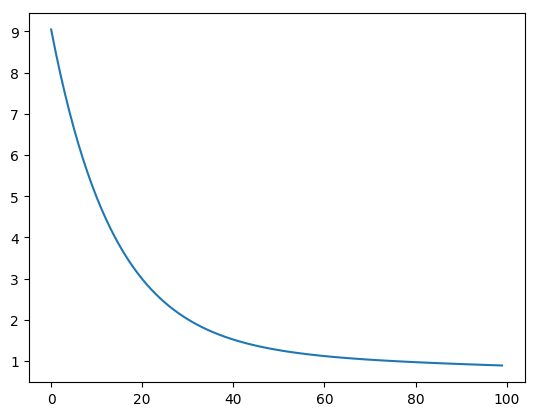

In [61]:
train_data, test_data = load_data()
x = train_data[:, :-1]
y = train_data[:, -1:]
# 创建网络
net = Network(13)
num_epochs = 100
losses = net.train(x, y, epoch = num_epochs, lr =0.01)
# 画出损失函数的变化趋势
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plot_x = np.arange(num_epochs)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()


## 随机梯度下降
我的理解就是按照原来的梯度，就是走过了400多组的数据，
现在我就是小样本


In [62]:
# 获取数据
training_data, test_data = load_data()
training_data.shape

(414, 14)

In [63]:
train_data1 = training_data[0:10]
training_data.shape

(414, 14)

In [64]:
x = train_data1[:,:-1]
y = train_data1[:,-1:]
net = Network(13)
loss = net.train(x, y, epoch = 10, lr = 0.01)
loss

iter 9, loss 2.6331388542913308


[4.509171660087307,
 4.2396814158301215,
 3.9879327981391954,
 3.752753653906569,
 3.533049281775715,
 3.327797314378464,
 3.1360429387373334,
 2.9568944324883786,
 2.789518995056159,
 2.6331388542913308]

In [65]:
# 获取数据
train_data, test_data = load_data()

# 打乱样本顺序
np.random.shuffle(train_data)

# 将train_data分成多个minibatch
batch_size = 10
n = len(train_data)
mini_batches = [train_data[k:k+batch_size] for k in range(0, n, batch_size)]

# 创建网络
net = Network(13)

# 依次使用每个mini_batch的数据
for mini_batch in mini_batches:
    x = mini_batch[:, :-1]
    y = mini_batch[:, -1:]
    loss = net.train(x, y, epoch=1)

(13, 1) -0.00734393078964766
(13, 1) -0.01503978705941207
(13, 1) -0.02198734841740064
(13, 1) -0.027612392422133772
(13, 1) -0.030951714549243413
(13, 1) -0.036234663040658956
(13, 1) -0.04187518354304533
(13, 1) -0.04789340196438472
(13, 1) -0.05377134886239507
(13, 1) -0.06137558936625145
(13, 1) -0.06601183586094918
(13, 1) -0.07126524024751746
(13, 1) -0.07543786930186244
(13, 1) -0.08041057883106599
(13, 1) -0.08373069146500882
(13, 1) -0.08815784493302921
(13, 1) -0.09255428433927367
(13, 1) -0.0957178662252167
(13, 1) -0.09940313468720299
(13, 1) -0.10375652703923578
(13, 1) -0.10758450263102805
(13, 1) -0.11056418388070041
(13, 1) -0.11445189610016325
(13, 1) -0.11687100225780525
(13, 1) -0.11929227298719904
(13, 1) -0.12168236393149258
(13, 1) -0.12389863085307348
(13, 1) -0.1272617419043652
(13, 1) -0.13002529391225737
(13, 1) -0.13466574905709622
(13, 1) -0.13711466084582138
(13, 1) -0.13918641965975076
(13, 1) -0.1403253870033293
(13, 1) -0.14326231740474912
(13, 1) -0.147

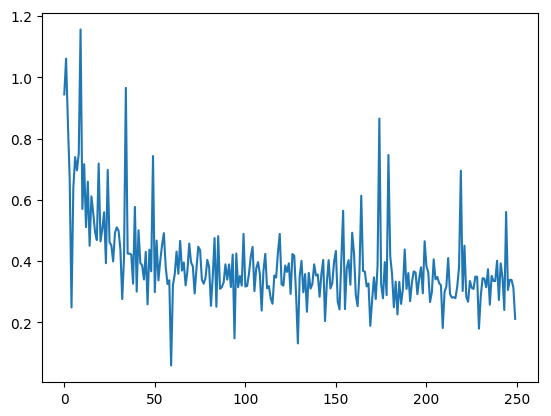

In [84]:
import numpy as np

class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        #np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        N = x.shape[0]
        gradient_w = 1. / N * np.sum((z-y) * x, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = 1. / N * np.sum(z-y)
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
        print(self.w.shape, self.b)
            
                
    def train(self, training_data, num_epochs, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epochs):
            # 在每轮迭代开始之前，将训练数据的顺序随机打乱
            # 然后再按每次取batch_size条数据的方式取出
            np.random.shuffle(training_data)
            # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
            mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                #print(self.w.shape)
                #print(self.b)
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                a = self.forward(x)
                loss = self.loss(a, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)
                # print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.
                #                  format(epoch_id, iter_id, loss))
        
        return losses

# 获取数据
train_data, test_data = load_data()

# 创建网络
net = Network(13)
# 启动训练
losses = net.train(train_data, num_epochs=50, batch_size=100, eta=0.01)

# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

[[0.00000000e+00 1.80000000e-01 7.34418420e-02 ... 1.00000000e+00
  8.96799117e-02 4.22222222e-01]
 [2.35922539e-04 0.00000000e+00 2.62405717e-01 ... 1.00000000e+00
  2.04470199e-01 3.68888889e-01]
 [2.35697744e-04 0.00000000e+00 2.62405717e-01 ... 9.89677910e-01
  6.34657837e-02 6.60000000e-01]
 ...
 [1.57855445e-01 0.00000000e+00 7.00277888e-01 ... 8.22977428e-02
  5.37803532e-01 2.71111111e-01]
 [2.11360069e-01 0.00000000e+00 7.00277888e-01 ... 6.64215065e-02
  9.00662252e-01 2.86666667e-01]
 [3.22013248e-01 0.00000000e+00 7.00277888e-01 ... 5.28455491e-01
  5.06346578e-01 2.51111111e-01]]


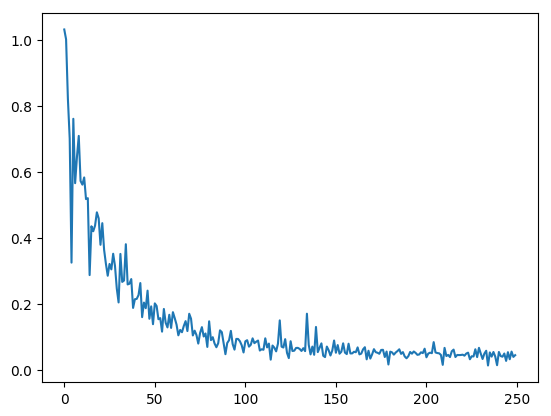

In [87]:
import numpy as np

class Network2(object): # 两层神经网络
    def __init__(self, num_of_inputs, num_of_hidden, num_of_outputs):
        # 初始化，如果是要两层的话
        self.w1 = np.random.randn(num_of_inputs,num_of_hidden) # 13*13
        self.b1 = np.zeros(num_of_hidden)
        self.w2 = np.random.randn(num_of_hidden,num_of_outputs)
        self.b2 = 0.
    
    def forward(self, x):
        # 前向就是xvw+b
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) +self.b2
        return self.z2

    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        thea2 = self.z2 - y # 这一行是原来那个底下的
        gradient_w2 = np.dot(self.a1.T,thea2)
        gradient_b2 = np.sum(thea2,axis=0)
        # 这里梯度要经过一个逆向求解
        thea1 = np.dot(thea2, self.w2.T) * (1 - np.power(self.a1, 2))
        gradient_w1 = np.dot(x.T, thea1)
        gradient_b1 = np.sum(thea1,axis=0)
        return gradient_w1, gradient_b1, gradient_w2, gradient_b2
    
    
    def update(self, gradient_w1, gradient_b1,gradient_w2, gradient_b2, eta = 0.01):
        
        self.w1 = self.w1 - eta * gradient_w1
        self.b1 = self.b1 - eta * gradient_b1
        
            
    def train(self, training_data, num_epochs, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epochs):
            np.random.shuffle(training_data)
            mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                X = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                z = self.forward(X)
                loss = self.loss(z, y)
                gradient_w1, gradient_b1, gradient_w2, gradient_b2 = self.gradient(X, y)
                self.update(gradient_w1, gradient_b1, gradient_w2, gradient_b2, eta)
                losses.append(loss)
                #print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.
                                    #format(epoch_id, iter_id, loss))
        return losses


# 获取数据
train_data, test_data = load_data()

print(train_data)
# 创建网络
net = Network2(13,13,1)
# 启动训练
losses = net.train(train_data, num_epochs=50, batch_size=100, eta=0.001)

# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

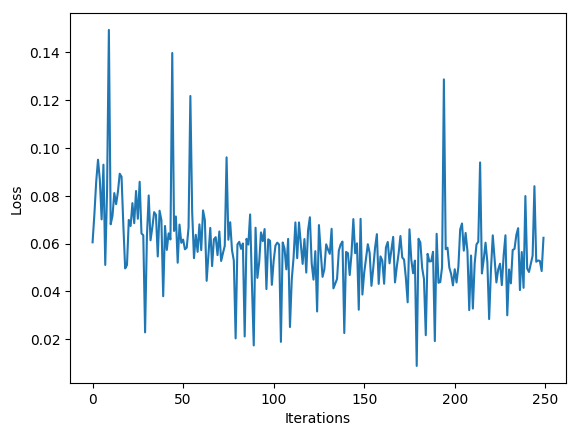

In [73]:
import numpy as np

class TwoLayerNetwork(object):
    def __init__(self, num_of_inputs, num_of_hidden, num_of_outputs):
        np.random.seed(0)
        self.W1 = np.random.randn(num_of_inputs, num_of_hidden)
        self.b1 = np.zeros((1, num_of_hidden))
        self.W2 = np.random.randn(num_of_hidden, num_of_outputs)
        self.b2 = np.zeros((1, num_of_outputs))
        
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def loss(self, y_pred, y_true):
        error = y_pred - y_true
        num_samples = y_pred.shape[0]
        cost = np.sum(error ** 2) / num_samples
        return cost
    
    def gradient(self, X, y_pred, y_true):
        m = y_pred.shape[0]
        delta2 = (y_pred - y_true) * self.sigmoid_derivative(self.z2)
        dW2 = np.dot(self.a1.T, delta2) / m
        db2 = np.sum(delta2, axis=0) / m
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.z1)
        dW1 = np.dot(X.T, delta1) / m
        db1 = np.sum(delta1, axis=0) / m
        return dW1, db1, dW2, db2
    
    def update(self, dW1, db1, dW2, db2, eta):
        self.W1 -= eta * dW1
        self.b1 -= eta * db1
        self.W2 -= eta * dW2
        self.b2 -= eta * db2
    
    def train(self, X, y, num_epochs, batch_size=10, eta=0.01):
        n = len(X)
        losses = []
        
        for epoch_id in range(num_epochs):
            np.random.seed(epoch_id)
            np.random.shuffle(X)
            np.random.seed(epoch_id)
            np.random.shuffle(y)
            
            mini_batches = [X[k:k+batch_size] for k in range(0, n, batch_size)]
            mini_batch_labels = [y[k:k+batch_size] for k in range(0, n, batch_size)]
            
            for mini_batch, mini_batch_label in zip(mini_batches, mini_batch_labels):
                y_pred = self.forward(mini_batch)
                loss = self.loss(y_pred, mini_batch_label)
                dW1, db1, dW2, db2 = self.gradient(mini_batch, y_pred, mini_batch_label)
                self.update(dW1, db1, dW2, db2, eta)
                losses.append(loss)
        
        return losses


# 获取数据
train_data, test_data = load_data()

# 创建网络
net = TwoLayerNetwork(num_of_inputs=13, num_of_hidden=5, num_of_outputs=1)

# 启动训练
losses = net.train(train_data[:, :-1], train_data[:, -1:], num_epochs=50, batch_size=100, eta=0.1)

# 画出损失函数的变化趋势
import matplotlib.pyplot as plt
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
